# Segmenting and Clustering Neighborhoods in Toronto - Part-3

#### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans # import k-means from clustering stage

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Importing the dataset saved from part 2 of the assignment

In [2]:
df = pd.read_csv('Toronto_1.csv')

In [3]:
df.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188


#### How many unique Boroughs in the city of Torornto?

In [4]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()), df.shape[0]))

The dataframe has 10 boroughs and 103 neighborhoods.


#### Use geopy library to get the latitude and longitude values of Toronto City.

In [5]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Map to visualize the Toronto neighborhoods

In [6]:
# create map of Toronto using latitude and longitude values
map_TO = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_TO)  
    
map_TO

#### Boroughs that contain the word Toronto and explore the dataframe

In [8]:
toronto_city = df[df['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_city.drop([19], inplace=True)
toronto_city1 = toronto_city.reset_index(drop=True)
toronto_city1

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804
3,M5C,Downtown Toronto,St. James Town,43.65215,-79.37587
4,M4E,East Toronto,The Beaches,43.67709,-79.29547
5,M5E,Downtown Toronto,Berczy Park,43.64536,-79.37306
6,M5G,Downtown Toronto,Central Bay Street,43.65609,-79.38493
7,M6G,Downtown Toronto,Christie,43.66869,-79.42071
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.64970,-79.38258
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.66505,-79.43891


In [9]:
toronto_city1.shape

(38, 5)

In [10]:
# create map of Toronto using latitude and longitude values
map_torontocity = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_city1['Latitude'], toronto_city1['Longitude'], toronto_city1['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_torontocity)  
    
map_torontocity

#### Define Foursquare Credentials and Version

In [11]:
CLIENT_ID = 'R2X33R3FLFB0KMY3NRD55Q4D55OQ53GSIWR3TG1XUT2ASAAA' # your Foursquare ID
CLIENT_SECRET = 'C51BALNDH0MR0L0QU3L0BT4BLE0QQMCIBN4DSVIP4RBSBIKQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R2X33R3FLFB0KMY3NRD55Q4D55OQ53GSIWR3TG1XUT2ASAAA
CLIENT_SECRET:C51BALNDH0MR0L0QU3L0BT4BLE0QQMCIBN4DSVIP4RBSBIKQ


# Explore Each Neighborhood

#### Function for getting the venue details for all of the neighborhood 

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [13]:
toronto_venues = getNearbyVenues(names=toronto_city1['Neighborhood'],
                                   latitudes=toronto_city1['Latitude'],
                                   longitudes=toronto_city1['Longitude'])

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West,  Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale


In [14]:
print(toronto_venues.shape) # size of the resulting dataframe

(1713, 7)


In [15]:
toronto_venues 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65512,-79.36264,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65512,-79.36264,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65512,-79.36264,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot
3,"Regent Park, Harbourfront",43.65512,-79.36264,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
4,"Regent Park, Harbourfront",43.65512,-79.36264,Berkeley Church,43.655123,-79.365873,Event Space
...,...,...,...,...,...,...,...
1708,"Business reply mail Processing Centre, South C...",43.64869,-79.38544,Red Eye Espresso,43.651150,-79.390146,Café
1709,"Business reply mail Processing Centre, South C...",43.64869,-79.38544,Kanga,43.649955,-79.389352,Pie Shop
1710,"Business reply mail Processing Centre, South C...",43.64869,-79.38544,Condom Shack,43.650542,-79.388138,Hobby Shop
1711,"Business reply mail Processing Centre, South C...",43.64869,-79.38544,Mi Taco Taqueria,43.650380,-79.388666,Taco Place


#### Check how many venues were returned for each neighborhood

In [16]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,64,64,64,64,64,64
"Brockton, Parkdale Village, Exhibition Place",87,87,87,87,87,87
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",100,100,100,100,100,100
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",77,77,77,77,77,77
Central Bay Street,63,63,63,63,63,63
Christie,11,11,11,11,11,11
Church and Wellesley,86,86,86,86,86,86
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,26,26,26,26,26,26


In [17]:
# Unique categories from the returned venues
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 219 uniques categories.


# Analyse Each Neighborhood

In [18]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Check for the new dataframe size
toronto_onehot.shape

(1713, 219)

In [20]:
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,...,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Berczy Park,0.015625,0.000000,0.000000,0.000000,0.015625,0.000000,0.015625,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.022989,0.011494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022989,...,0.000000,0.011494,0.000000,0.000000,0.000000,0.011494,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.010000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.015873,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015873,0.015873,0.015873,0.000000
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.011628,0.000000,0.011628,0.011628,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,0.000000,0.000000
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
# Confirm the new size
toronto_grouped.shape

(38, 219)

In [22]:
# Print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.05
3            Beer Bar  0.03
4              Bakery  0.03


----Brockton, Parkdale Village, Exhibition Place----
         venue  freq
0          Bar  0.07
1  Coffee Shop  0.06
2         Café  0.06
3   Restaurant  0.05
4    Gift Shop  0.03


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
              venue  freq
0       Coffee Shop  0.07
1             Hotel  0.05
2        Restaurant  0.03
3              Café  0.03
4  Asian Restaurant  0.03


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                venue  freq
0  Italian Restaurant  0.08
1         Coffee Shop  0.06
2                Café  0.05
3   French Restaurant  0.04
4                 Bar  0.04


----Central Bay Street----
                       venue  freq
0                Coffee Shop  0

### Put that top 5 values in a dataframe

#### Write a fuction to sort venues in descending order

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
# Create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Farmers Market,Restaurant,Cheese Shop,Concert Hall,Creperie
1,"Brockton, Parkdale Village, Exhibition Place",Bar,Coffee Shop,Café,Restaurant,Gift Shop,Bakery,Sandwich Place,Yoga Studio,Burrito Place,French Restaurant
2,"Business reply mail Processing Centre, South C...",Coffee Shop,Hotel,Restaurant,Café,Asian Restaurant,Bar,Seafood Restaurant,Concert Hall,Sandwich Place,Mediterranean Restaurant
3,"CN Tower, King and Spadina, Railway Lands, Har...",Italian Restaurant,Coffee Shop,Café,French Restaurant,Bar,Park,Gym / Fitness Center,Intersection,Bakery,Grocery Store
4,Central Bay Street,Coffee Shop,Clothing Store,Hotel,Middle Eastern Restaurant,Bubble Tea Shop,Restaurant,Plaza,Sandwich Place,Cosmetics Shop,Seafood Restaurant
5,Christie,Café,Grocery Store,Italian Restaurant,Baby Store,Athletics & Sports,Coffee Shop,Candy Store,Playground,Monument / Landmark,Moroccan Restaurant
6,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Café,Gay Bar,Men's Store,Dance Studio,Fast Food Restaurant,Pub
7,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Hotel,Café,Italian Restaurant,American Restaurant,Gym,Japanese Restaurant,Seafood Restaurant,Beer Bar
8,Davisville,Dessert Shop,Café,Sandwich Place,Italian Restaurant,Pizza Place,Coffee Shop,Thai Restaurant,Sushi Restaurant,Seafood Restaurant,Fast Food Restaurant
9,Davisville North,Food & Drink Shop,Gym / Fitness Center,Japanese Restaurant,Park,Department Store,Breakfast Spot,Hotel,Miscellaneous Shop,Middle Eastern Restaurant,New American Restaurant


# Clustering of Neighborhoods

#### In order to identify the optimal number of clusters, we need to use the Elbow Method! When the slope of the tangent line starts to be almost horizontal, that is the optimal number of cluster!

In [25]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

distortions = []

K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(toronto_grouped_clustering)
    distortions.append(kmean.inertia_)

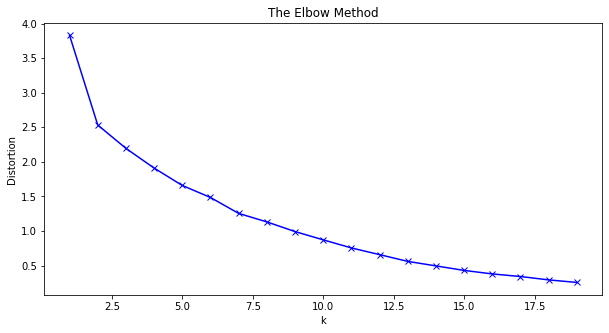

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

#### The elbow method seems to suggest 7 or 8 clusters

In [27]:
kclusters = 7

#run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_city1

# merge toronto_grouped with toronto_city1 to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264,1,Coffee Shop,Restaurant,Breakfast Spot,Yoga Studio,Thai Restaurant,Distribution Center,Electronics Store,Pub,Event Space,Food Truck
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188,0,Coffee Shop,Sandwich Place,Italian Restaurant,Bank,Theater,Falafel Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Park,Café
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804,1,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Japanese Restaurant,Cosmetics Shop,Hotel,Chinese Restaurant,Movie Theater,Diner
3,M5C,Downtown Toronto,St. James Town,43.65215,-79.37587,1,Coffee Shop,Clothing Store,Cosmetics Shop,Gastropub,Italian Restaurant,Cocktail Bar,Café,Hotel,Moroccan Restaurant,Park
4,M4E,East Toronto,The Beaches,43.67709,-79.29547,1,Health Food Store,Pizza Place,Trail,Pub,Asian Restaurant,Yoga Studio,Monument / Landmark,Museum,Movie Theater,Moroccan Restaurant
5,M5E,Downtown Toronto,Berczy Park,43.64536,-79.37306,1,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Farmers Market,Restaurant,Cheese Shop,Concert Hall,Creperie
6,M5G,Downtown Toronto,Central Bay Street,43.65609,-79.38493,1,Coffee Shop,Clothing Store,Hotel,Middle Eastern Restaurant,Bubble Tea Shop,Restaurant,Plaza,Sandwich Place,Cosmetics Shop,Seafood Restaurant
7,M6G,Downtown Toronto,Christie,43.66869,-79.42071,1,Café,Grocery Store,Italian Restaurant,Baby Store,Athletics & Sports,Coffee Shop,Candy Store,Playground,Monument / Landmark,Moroccan Restaurant
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.64970,-79.38258,1,Café,Coffee Shop,Hotel,Restaurant,Gym,Japanese Restaurant,American Restaurant,Salad Place,Steakhouse,Asian Restaurant
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.66505,-79.43891,1,Furniture / Home Store,Park,Pharmacy,Athletics & Sports,Brazilian Restaurant,Smoke Shop,Middle Eastern Restaurant,Bank,Bakery,Grocery Store


In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [30]:
# Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown Toronto,0,Coffee Shop,Sandwich Place,Italian Restaurant,Bank,Theater,Falafel Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Park,Café
30,Central Toronto,0,Coffee Shop,Light Rail Station,Supermarket,Liquor Store,Yoga Studio,New American Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant


In [31]:
# Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,1,Coffee Shop,Restaurant,Breakfast Spot,Yoga Studio,Thai Restaurant,Distribution Center,Electronics Store,Pub,Event Space,Food Truck
2,Downtown Toronto,1,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Japanese Restaurant,Cosmetics Shop,Hotel,Chinese Restaurant,Movie Theater,Diner
3,Downtown Toronto,1,Coffee Shop,Clothing Store,Cosmetics Shop,Gastropub,Italian Restaurant,Cocktail Bar,Café,Hotel,Moroccan Restaurant,Park
4,East Toronto,1,Health Food Store,Pizza Place,Trail,Pub,Asian Restaurant,Yoga Studio,Monument / Landmark,Museum,Movie Theater,Moroccan Restaurant
5,Downtown Toronto,1,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Farmers Market,Restaurant,Cheese Shop,Concert Hall,Creperie
6,Downtown Toronto,1,Coffee Shop,Clothing Store,Hotel,Middle Eastern Restaurant,Bubble Tea Shop,Restaurant,Plaza,Sandwich Place,Cosmetics Shop,Seafood Restaurant
7,Downtown Toronto,1,Café,Grocery Store,Italian Restaurant,Baby Store,Athletics & Sports,Coffee Shop,Candy Store,Playground,Monument / Landmark,Moroccan Restaurant
8,Downtown Toronto,1,Café,Coffee Shop,Hotel,Restaurant,Gym,Japanese Restaurant,American Restaurant,Salad Place,Steakhouse,Asian Restaurant
9,West Toronto,1,Furniture / Home Store,Park,Pharmacy,Athletics & Sports,Brazilian Restaurant,Smoke Shop,Middle Eastern Restaurant,Bank,Bakery,Grocery Store
10,Downtown Toronto,1,Coffee Shop,Hotel,Japanese Restaurant,Park,Plaza,Boat or Ferry,Sandwich Place,Shopping Mall,Restaurant,Electronics Store


In [32]:
# Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Central Toronto,2,Park,Yoga Studio,New American Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark


In [33]:
# Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Central Toronto,3,Playground,Gym,Trail,Tennis Court,Yoga Studio,New American Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant


In [34]:
# Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,West Toronto,4,Park,Convenience Store,Pub,Nightclub,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant


In [35]:
# Cluster 6
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,5,Gym Pool,Playground,Park,Yoga Studio,New American Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant
32,Downtown Toronto,5,Park,Playground,Bike Trail,Yoga Studio,New American Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant


In [36]:
# Cluster 7
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,6,Bus Line,Business Service,Swim School,Yoga Studio,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark
